In [ ]:
# Mounting to Google Drive:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**VGG-16 Inspired model building from scratch**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

# Load and create training and validation data sets
dataset_path = '/content/gdrive/My Drive/ML2/realwaste-main/RealWaste'

train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32,
    shuffle=True  # Ensure the data is shuffled
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

# Start of the model
def create_vgg16_like_model_2(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        # Data augmentation
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomTranslation(0.2, 0.2),

        # Data normalization
        layers.Rescaling(1./255),

        # Convolutional Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Convolutional Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Convolutional Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Convolutional Block 4
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Convolutional Block 5
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Global Average Pooling layer
        layers.GlobalAveragePooling2D(),

        # Dropout and Dense layers
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

input_shape = (256, 256, 3)  # Height, width, and RGB
num_classes = 9  # Number of classes in the dataset

model = create_vgg16_like_model_2(input_shape, num_classes)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Saving the model in Google Drive
checkpoint_path = '/content/gdrive/My Drive/ML2/MiniVGG16_2.keras'
checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,
    monitor='val_loss'
)

early_stopping_callback = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

# Train the model
epochs = 120
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[checkpoint_callback, early_stopping_callback]  # Pass callback to training
)

Found 4752 files belonging to 9 classes.
Using 3802 files for training.
Found 4752 files belonging to 9 classes.
Using 950 files for validation.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation                   │ (None, 256, 256, 3)         │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 256)         │         590,0

 Total params: 3,682,473 (14.05 MB)

 Trainable params: 3,682,473 (14.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120
119/119 ━━━━━━━━━━━━━━━━━━━━ 55s 340ms/step - accuracy: 0.1779 - loss: 2.1703 - val_accuracy: 0.2084 - val_loss: 2.1299
Epoch 2/120
119/119 ━━━━━━━━━━━━━━━━━━━━ 64s 271ms/step - accuracy: 0.2005 - loss: 2.1275 - val_accuracy: 0.2832 - val_loss: 2.0219
Epoch 3/120
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 265ms/step - accuracy: 0.2435 - loss: 2.0497 - val_accuracy: 0.2821 - val_loss: 2.0289
Epoch 4/120
119/119 ━━━━━━━━━━━━━━━━━━━━ 33s 280ms/step - accuracy: 0.2720 - loss: 2.0078 - val_accuracy: 0.3137 - val_loss: 1.9436
Epoch 5/120
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 265ms/step - accuracy: 0.2734 - loss: 1.9827 - val_accuracy: 0.2811 - val_loss: 1.9992
Epoch 6/120
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 264ms/step - accuracy: 0.2833 - loss: 1.9548 - val_accuracy: 0.3042 - val_loss: 1.9784
Epoch 7/120
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 265ms/step - accuracy: 0.2894 - loss: 1.9480 - val_accuracy: 0.2926 - val_loss: 1.9579
Epoch 8/120
119/119 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step - accuracy: 0.2840 -

**Discussing the Chosen Model Architecture**

The goal of this model is to perform multiclass classification on the RealWaste dataset. I designed this model from scratch, by drawing inspiration from the VGG16 architecture, which is known for its strong performance in image classification tasks, and is also one of the models used in the study by Single et al.. The VGG16 model is unique due to its use of multiple convolutional blocks, each containing several convolutional layers followed by a max-pooling layer. This architecture has proven effective in capturing hierarchical features from images (Rank-4 tensors), making it suitable for the task at hand.

These preprocessing/data augmentation steps, including random flips, rotations, zooms, and translations, as well as rescaling of pixel values, have already been discussed previously, so I will focus here on the core of the model architecture.

Convolutional Blocks: The model is built with five convolutional blocks, each consisting of 2-3 convolutional layers with ReLU activation functions, followed by a max-pooling layer. These blocks are inspired by the design of VGG16, which stacks multiple convolutional layers together to slowly capture more complex features at each block. The first block starts with 32 filters, and as the blocks progress, the number of filters increases to 256, mimicing the VGG16 approach of creating deeper networks while broadening the feature maps.

The first two blocks, with 32 and 64 filters respectively, capture basic features like edges and textures of the images in the RealWaste dataset.
The deeper blocks (e.g., 3, 4, 5), with up to 256 filters, are crucial for identifying more complex patterns and structures in the images. These complex features can include shapes and contours, parts of an object, etc. This is arguably the most important layers to distinguish between the 9 classes.

After the convolutional blocks, a global average pooling layer is used to reduce the dimensionality of the feature maps, converting the images (Rank-4 tensor) output from the convolutional layers into vectors (Rank-2 tensor). This is important as it reduces the risk of overfitting by compressing the information into a more manageable size, whilst also decreasing the computational load required for the following dense layers.

The model includes a dropout layer with a rate of 0.5, which randomly sets 50% of the inputs to zero during training. This regularization technique is works well to prevent the model from overfitting, especially given the relatively small size of the RealWaste dataset compared to the large number of parameters in the model.

The final dense layer consists of 9 units, corresponding to the 9 classes in the dataset, with a softmax activation function to output class probabilities. The softmax function is used for multiclass classification, ensuring that the sum of the output for all 9 class probabilities equals 1.

I considered using other architectures like ResNet50 and InceptionV3, but the VGG16-inspired architecture was chosen due to its straightforward and effective approach to feature extraction. VGG16's method of stacking convolutional layers has been well-documented in image classification tasks, and the simplistic design allows me to easily add adjustments or make modifications in each convolutional block.

**Code to plot model training and validation performance**

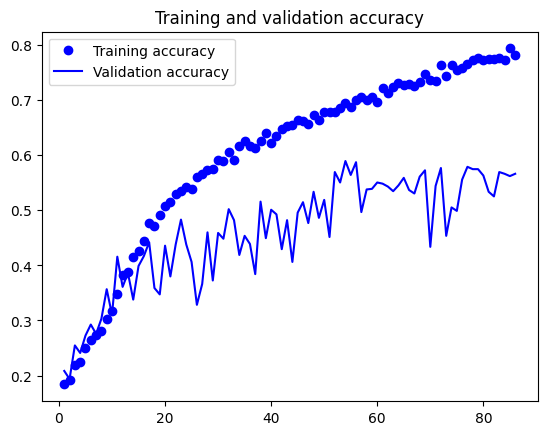

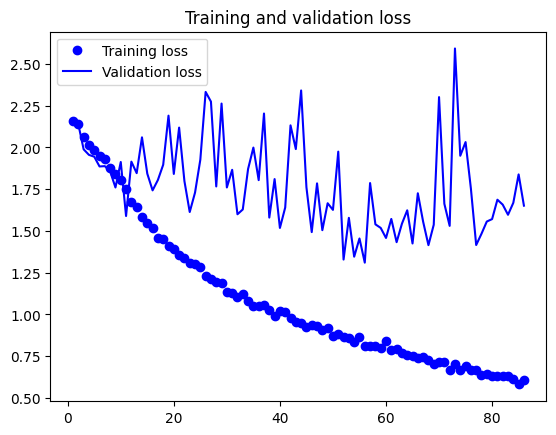

30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.5658 - loss: 1.3749
Validation Loss: 1.3105239868164062
Validation Accuracy: 0.5873684287071228


In [ ]:
# Plotting the training and validation accuracy and loss values
def plot_history(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, "bo", label="Training accuracy")
    plt.plot(epochs, val_acc, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()

plot_history(history)

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(validation_dataset)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

**Discussing the Results Based on Accuracy and Loss Plot**

The training accuracy curve shows a steady upward trend, starting from around 20% and increasing to nearly 75% by the 88th epoch. This indicates that the model is learning the patterns from the training data well.

The training loss consistently decreases, starting from about 2.4 and dropping below 0.75 by the end of the training. This decrease in loss is expected and corresponds with the increase in training accuracy, showing that the model is able to minimizing the error on the training dataset.

The validation accuracy begins at a lower point, around 20%, and slowly improves to just under 60%. However, unlike the smooth increase seen in training accuracy, the validation accuracy shows extreme fluctuations throughout the training process. This fluctuation, especially after around 40 epochs, means that the model could be struggling to generalize well to the validation data and may be starting to overfit.

The best validation accuracy and loss, at approximately 0.58 and 1.31 respectively, happens around 88 epochs. This could be considered a local minimum where the model is balancing between learning and overfitting, but the significant fluctuations in the validation metrics indicate that the models performance is unstable.

In order to handle the models effectiveness, lowering the learning rate could prove useful to deal with the significant fluctuations seen in both metrics. Including regulization techniques such as L2 regulization could potentially help reduce overfitting by reducing the models reliance on any single set of features. Finally, the early stop is set for 15 epochs, this may be reasonable for models with less significant fluctuations, but this could have potentially be increased to 30 or more.




**Predicting Images**

In [ ]:
def preprocess_image(image_url, image_id):
  # Download the image
  image_path = tf.keras.utils.get_file(image_id, origin=image_url)

  # Load the image
  img = tf.keras.utils.load_img(image_path, target_size=(256, 256))

  # Convert the image to an array
  img_array = tf.keras.utils.img_to_array(img)

  # Expand dimensions to match the expected input format
  img_array = tf.expand_dims(img_array, 0)

  # Rescale the pixel values to the range [0, 1]
  img_array = img_array / 255.0

  return img_array

In [ ]:
# Predicting the most likely class for the image

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Class name based on the naming from the original files
class_name = [
    'Cardboard',
    'Food Organics',
    'Glass',
    'Metal',
    'Miscellaneous Trash',
    'Paper',
    'Plastic',
    'Textile Trash',
    'Vegetation'
]

# Preprocess the image
processed_image = preprocess_image('https://upload.wikimedia.org/wikipedia/commons/9/99/Smirnoffbottle.jpg',
                                   'Smirnoffbottle')

# Make a prediction using the trained model
predictions = model.predict(processed_image)

# Get the top 4 predictions
top_4_indices = np.argsort(predictions[0])[-4:][::-1]  # Sort and get top 3 indices
top_4_classes = [class_name[i] for i in top_4_indices]
top_4_scores = [predictions[0][i] for i in top_4_indices]

# Print the top 4 predicted classes with their probabilities
for i in range(4):
    print(f"Rank {i+1}: {top_4_classes[i]} with probability {top_4_scores[i]:.4f}")

251974/251974 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
Rank 1: Glass with probability 0.7947
Rank 2: Plastic with probability 0.0870
Rank 3: Metal with probability 0.0504
Rank 4: Miscellaneous Trash with probability 0.0367
